# Desafio - Classificação de score de crédito

### Contexto

Você está trabalhando como cientista de dados em uma empresa financeira global.
Ao longo dos anos, a empresa coletou dados bancários básicos e reuniu muitas informações relacionadas a crédito. 

### Objetivo

A administração quer construir um sistema inteligente para segregar as pessoas em faixas de pontuação de crédito para reduzir os esforços manuais.
Problema a ser resolvido
Dadas as informações relacionadas ao crédito de uma pessoa, construa um modelo de aprendizado de máquina que possa classificar a pontuação de crédito. 
Analise o que faz alguém ter um score maior ou menor, a quantidade de empréstimos é relevante? O saldo mensal?

### Informações sobre as features


- ID - Id único
- Customer_ID - Identificador único de uma pessoa
- Month - O mês do ano
- Name - O nome de uma pessoa
- Age - Idade da pessoa
- SSN - O número do seguro social da pessoa
- Occupation - Ocupação da pessoa
- Annual_Income - Renda anual da pessoa
- Monthly_Inhand_Salary - O salário mensal base da pessoa
- Num_Bank_Accounts - Representa o número de contas bancárias que a pessoa tem
- Num_Credit_Card - O número de cartões de crédito que uma pessoa tem
- Interest_Rate - Juros do cartão de crédito
- Num_of_Loan - Número de empréstimos a pessoa possui
- Type_of_Loan - Os tipos de empréstimos obtidos pela pessoa
- Delay_from_due_date - Representa a quantidade de dias de atraso no pagamento do empréstimo
- Num_of_Delayed_Payment - A média de pagamentos atrasados de uma pessoa
- Changed_Credit_Limit - Variação percentual no limite do cartão de crédito
- Num_Credit_Inquiries - Número de consultas de cartão de crédito
- Credit_Mix - Classificação do mix de créditos
- Outstanding_Debt - Representa a dívida restante a ser paga (em USD)
- Credit_Utilization_Ratio - Taxa de utilização do cartão de crédito
- Credit_History_Age - Idade do histórico de crédito da pessoa
- Payment_of_Min_Amount - Se apenas o valor mínimo da parcela foi pago pela pessoa
- Total_EMI_per_month - Pagamentos mensais de EMI (em USD dólares)
- Amount_invested_monthly - Valor mensal investido pelo cliente (em USD dólares)
- Payment_Behaviour - Comportamento de pagamento do cliente (em USD)
- Monthly_Balance - Valor do saldo mensal do cliente (em USD)
- Credit_Score - Score de crédito da pessoa (Target)




## 1. Importando as bibliotecas

In [287]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
import datetime
from datetime import date
from collections import Counter
import random


### Remove unnecessary warnings
import warnings
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

### Data Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns

###Preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Modelling 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Model Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

## 2. Importando dataset


In [288]:

df = pd.read_csv('train.csv')

In [289]:
# Para preservar os dados brutos
df_train = df.copy()

## 3. Data Analysis



### 3.1 Data Inspection

In [290]:
# Verificando as primeiras linhas do dataset

df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [291]:
#Verificando o tamanho das bases

df_train.shape

(100000, 28)

In [292]:
df.Credit_Score.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [293]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [294]:
categorical = df_train.dtypes[df_train.dtypes == "object"].index
df_train[categorical].describe().transpose()

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [295]:
#Subistituindo caracteres diferenciados que possivelmente foram preenchidos por serem campos obrigatórios por nan:

df_train = df_train.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [296]:
#Alterar o tipo dos dados

df_train.Age = df_train.Age.astype(int)
df_train.Annual_Income = df_train.Annual_Income.astype(float)
df_train.Num_of_Loan = df_train.Num_of_Loan.astype(int)
df_train.Num_of_Delayed_Payment = df_train.Num_of_Delayed_Payment.astype(float)
df_train.Changed_Credit_Limit = df_train.Changed_Credit_Limit.astype(float)
df_train.Outstanding_Debt = df_train.Outstanding_Debt.astype(float)
df_train.Amount_invested_monthly = df_train.Amount_invested_monthly.astype(float)
df_train.Monthly_Balance = df_train.Monthly_Balance.astype(float)

In [297]:
# Tranformando a coluna de tempo de histórico de crédito de texto para tempo 

nd= df_train.copy()
nd['Credit_History_Age'] = nd['Credit_History_Age'].replace('nan', np.nan).fillna(0)   
nd['Credit_History_Age'] = nd['Credit_History_Age'].astype(str)                       
nd['History_Year'] = nd['Credit_History_Age'].str[ :2]          
nd['History_Month'] = nd['Credit_History_Age'].str[ -9:-7] 

nd['History_Year'] = pd.to_numeric(nd['History_Year']) 
nd['History_Month'] = pd.to_numeric(nd['History_Month']) 
nd['Credit_History_Age'] = nd['History_Year']*12 + nd['History_Month'] 
nd = nd.drop(['History_Year'], axis = 1)  
nd = nd.drop(['History_Month'], axis = 1)
df_train = nd

In [298]:
#Verificando datatypes após alteração do dtype

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

In [299]:
df_train.describe().T.style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Age,100000.000000,110.649700,686.244717,-500.000000,24.000000,33.000000,42.000000,8698.000000
Annual_Income,100000.000000,176415.701298,1429618.051414,7005.930000,19457.500000,37578.610000,72790.920000,24198062.000000
Monthly_Inhand_Salary,84998.000000,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.000000,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.000000,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.000000,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Num_of_Loan,100000.000000,3.009960,62.647879,-100.000000,1.000000,3.000000,5.000000,1496.000000
Delay_from_due_date,100000.000000,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,92998.000000,30.923342,226.031892,-3.000000,9.000000,14.000000,18.000000,4397.000000
Changed_Credit_Limit,97909.000000,10.389025,6.789496,-6.490000,5.320000,9.400000,14.870000,36.970000


In [300]:
#verificar valores nulos organizando do que possui maior quantidade de nulos para o menor

df_train.isnull().sum().sort_values(ascending = False)

Credit_Mix                  20195
Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Payment_Behaviour            7600
Occupation                   7062
Num_of_Delayed_Payment       7002
SSN                          5572
Amount_invested_monthly      4479
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Outstanding_Debt                0
ID                              0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

### 3.2 Data Cleaning

Vimos acima que temos muitos valores nulos, para tentarmos não perder tantos dados, vamos tratar esses valores.

<AxesSubplot:>

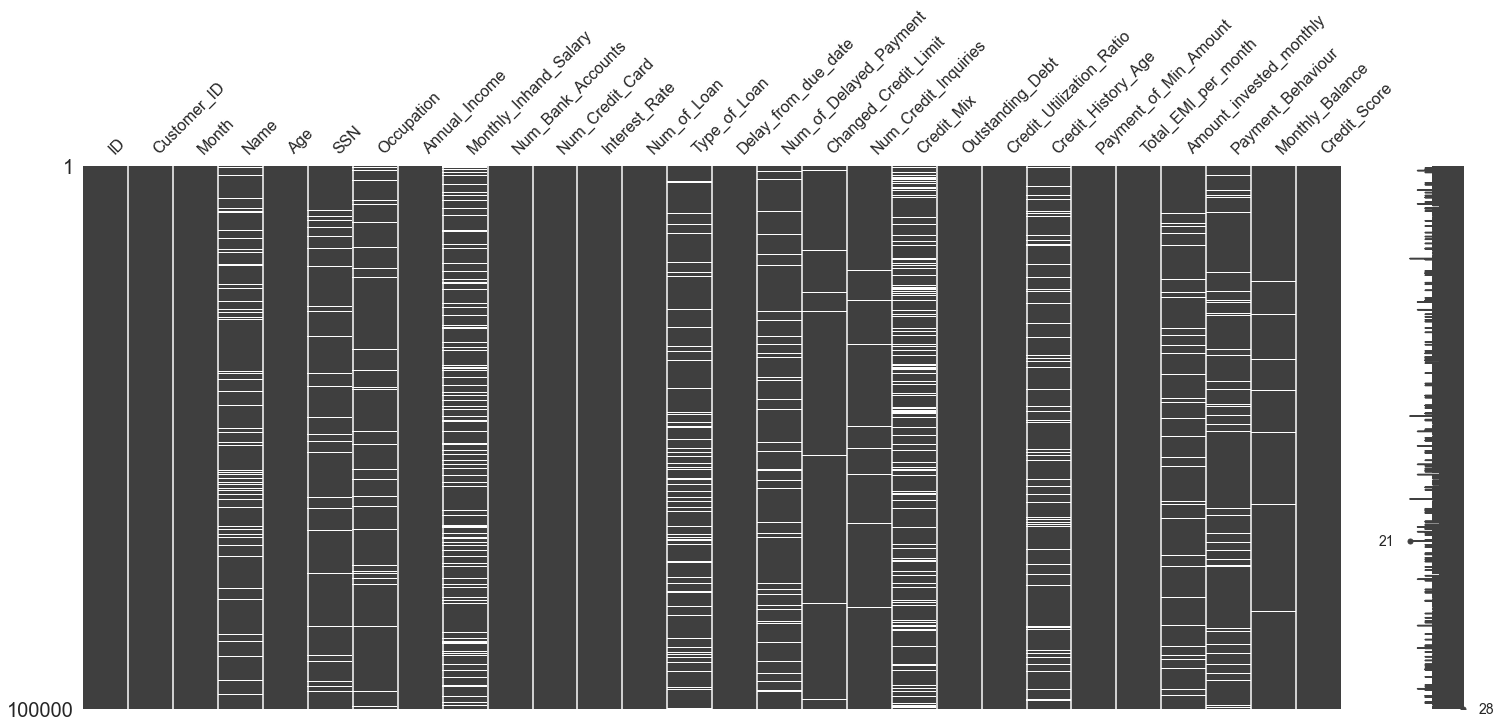

In [301]:
missingno.matrix(df_train)

In [302]:
def cleaning_Null_columns(df_column,method,headlines):
  print('Antes: \n',)
  print(df_column.value_counts(dropna = False).head(headlines))
  print('\n-----------------------------------\n')
  print('Depois: \n')
  df_column.fillna(method = method, inplace = True)
  return df_column.value_counts(dropna = False)

In [303]:
# Vamos começar pela coluna onde temos mais valores faltantes e assim continuaremos seguindo- 'Credit_Mix'
# O método ffill() substitui os valores NULL pelo valor da linha anterior

cleaning_Null_columns(df_train['Credit_Mix'],'ffill',40)

Antes: 

Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: Credit_Mix, dtype: int64

-----------------------------------

Depois: 



Standard    45820
Good        30351
Bad         23828
NaN             1
Name: Credit_Mix, dtype: int64

In [304]:
#Type of Loan

### Buscando os dados não nulos da coluna - Tipo de dados

index_values = ~df_train['Type_of_Loan'].isnull().values
loan_type_data = list(df_train['Type_of_Loan'][index_values])
loan_type_data
### Criando uma lista para cada tipo de emprestimo

# auto_loan = [0] * (len(df_train))
# credit_builder_loan = [0] * (len(df_train))
# personal_loan = [0] * (len(df_train))
# home_equity_loan = [0] * (len(df_train))
# mortgage_loan = [0] * (len(df_train))
# student_loan = [0] * (len(df_train))
# debt_consolidation_loan = [0] * (len(df_train))
# payday_loan = [0] * (len(df_train))

# ### Usando 0 e 1 para saber se o cliente possui determinado tipo de emprestimo ou não

# for index in range(len(loan_type_data)):
#     if 'Auto' in loan_type_data[index]:
#         auto_loan[index] = 1
#     if 'Credit-Builder' in loan_type_data[index]:
#         credit_builder_loan[index] = 1
#     if 'Personal' in loan_type_data[index]:
#         personal_loan[index] = 1
#     if 'Home' in loan_type_data[index]:
#         home_equity_loan[index] = 1
#     if 'Mortgage' in loan_type_data[index]:
#         mortgage_loan[index] = 1
#     if 'Student' in loan_type_data[index]:
#         student_loan[index] = 1
#     if 'Debt' in loan_type_data[index]:
#         debt_consolidation_loan[index] = 1
#     if 'Payday' in loan_type_data[index]:
#         payday_loan[index] = 1

# ### Adicionando as colunas no df_train

# df_train['Auto_Loan'] = auto_loan
# df_train['Credit_Builder_Loan'] = credit_builder_loan
# df_train['Personal_Loan'] = personal_loan
# df_train['Home_Enquity_Loan'] = home_equity_loan
# df_train['Mortgage_Loan'] = mortgage_loan
# df_train['Student_Loan'] = student_loan
# df_train['Debt_Consolidation_Loan'] = debt_consolidation_loan
# df_train['Payday_Loan'] = payday_loan




['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [305]:
df_train['Type_of_Loan'] = df_train['Type_of_Loan'].fillna("Don't have a loan")

In [306]:
df_train['Monthly_Inhand_Salary'] = df_train['Monthly_Inhand_Salary'].fillna(df_train['Monthly_Inhand_Salary'].mean())

In [307]:
# 'Credit_History_Age'

df_train['Credit_History_Age'] = df_train['Credit_History_Age'].fillna(df_train['Credit_History_Age'].mean())


In [308]:
# Payment_Behaviour
cleaning_Null_columns(df_train['Payment_Behaviour'],'ffill',50)


Antes: 

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
NaN                                  7600
Name: Payment_Behaviour, dtype: int64

-----------------------------------

Depois: 



Low_spent_Small_value_payments      27593
High_spent_Medium_value_payments    19010
Low_spent_Medium_value_payments     14987
High_spent_Large_value_payments     14863
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments      11297
Name: Payment_Behaviour, dtype: int64

In [309]:
# Occupation 

cleaning_Null_columns(df_train['Occupation'],'ffill',30)

Antes: 

NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

-----------------------------------

Depois: 



Lawyer           7097
Engineer         6849
Architect        6832
Mechanic         6775
Scientist        6746
Accountant       6745
Media_Manager    6732
Developer        6712
Teacher          6685
Entrepreneur     6653
Doctor           6564
Journalist       6534
Manager          6422
Musician         6345
Writer           6309
Name: Occupation, dtype: int64

In [310]:
# Calculando a média para a coluna Amount_invested_monthly 
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].fillna(df_train['Amount_invested_monthly'].mean())

In [311]:
# Num_of_Delayed_Payment
# Calculando a média para a coluna Num_of_Delayed_Payment

df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].fillna(df_train['Num_of_Delayed_Payment'].mean())

In [312]:
# Changed_Credit_Limit 

df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].fillna(df_train['Changed_Credit_Limit'].mean())


In [313]:
# Num_Credit_Inquiries        

df_train['Num_Credit_Inquiries'] = df_train['Num_Credit_Inquiries'].fillna(0)

In [314]:
# 'Monthly_Balance'
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].fillna(0)


In [315]:
#Excluindo valores unicos que não usaremos mais

df_train = df_train.dropna()

df_train.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis = 1, inplace = True)

df_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,February,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,221.195405,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.000000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.000000,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.000000,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,270.000000,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,34.663572,378.000000,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,40.565631,379.000000,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,380.000000,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,381.000000,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [316]:
#verificar valores nulos organizando do que possui maior quantidade de nulos para o menor

df_train.isnull().sum().sort_values(ascending = False)

Month                       0
Age                         0
Monthly_Balance             0
Payment_Behaviour           0
Amount_invested_monthly     0
Total_EMI_per_month         0
Payment_of_Min_Amount       0
Credit_History_Age          0
Credit_Utilization_Ratio    0
Outstanding_Debt            0
Credit_Mix                  0
Num_Credit_Inquiries        0
Changed_Credit_Limit        0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Type_of_Loan                0
Num_of_Loan                 0
Interest_Rate               0
Num_Credit_Card             0
Num_Bank_Accounts           0
Monthly_Inhand_Salary       0
Annual_Income               0
Occupation                  0
Credit_Score                0
dtype: int64

Agora vamos remover valores muito discrepantes que foram observados na exploratória, ainda não não outliers, mas entendemos que trata-se de preenchimento incorreto

In [317]:
# Como vimos na exploratória, é impossivel um cliente ter quantidade de conta bancaria negativa, bem como dificilmente ele terá 20 contas bancarias, por exemplo.

print('Descrição estatística:\n',df_train.Num_Bank_Accounts.describe())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train.Num_Bank_Accounts > 10].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_Bank_Accounts.value_counts().head(10))

Descrição estatística:
 count    84990.000000
mean        17.204130
std        117.919539
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

*************************************

Tamanho da coluna:
 (1137, 24)

*************************************

Contagem de valores:
 6     11118
7     10875
8     10835
4     10341
5     10311
3     10109
9      4603
10     4499
1      3775
2      3688
Name: Num_Bank_Accounts, dtype: int64


Podemos ver que a quantidade "normal" de quantidade bancárias está entre 0 e 9 contas, sendo assim, vamos substituir os valores que estão acima disso por valores aleatórios dentro do intervalo de valores mais comuns.


In [318]:
most_common_number = [0,1,2,3,4,5,6,7,8,9]
for num in df_train.Num_Bank_Accounts:
  if num not in most_common_number:
    df_train.Num_Bank_Accounts.replace(num,random.choice(most_common_number),inplace = True)

In [319]:
# Vamos repetir o processo para os cartões de crédito

print('Valores da coluna:\n',df_train.Num_Credit_Card.unique())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train['Num_Credit_Card'] > 10].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_Credit_Card.value_counts().head(10))

Valores da coluna:
 [   4 1385    5 ...  955 1430  679]

*************************************

Tamanho da coluna:
 (1941, 24)

*************************************

Contagem de valores:
 5     15607
7     14137
6     14133
4     11865
3     11381
8      4219
10     4114
9      3957
2      1840
1      1783
Name: Num_Credit_Card, dtype: int64


In [320]:
most_common_number = [1,2,3,4,5,6,7,8,9,10]
for num in df_train.Num_Credit_Card:
  if num not in most_common_number:
    df_train.Num_Credit_Card.replace(num,random.choice(most_common_number),inplace = True)

In [321]:
#Repetindo o processo para a coluna Num_of_Loan 

print('Tamanho da coluna:\n',df_train[df_train['Num_of_Loan'] > 10].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_of_Loan .value_counts().head(10))

Tamanho da coluna:
 (403, 24)

*************************************

Contagem de valores:
  3      12763
 2      12741
 4      12550
 0       9291
 1       9029
 6       6666
 7       6255
 5       6161
-100     3300
 9       3126
Name: Num_of_Loan, dtype: int64


Uma pessoa não pode possuir uma quantidade negativa de emprestimos e é improvavel que ultrapasse 10 emprestimos simultaneamente conforme vemos acima. Sendo assim substituiremos também esses casos.

In [322]:
for loan in df_train.Num_of_Loan:
  if loan > 9 or loan < 0:
      df_train['Num_of_Loan'].replace(loan,random.randint(0,9),inplace= True)

In [323]:
#Repetindo o processo para a coluna Total_EMI_per_month

print('Tamanho da coluna:\n',df_train[df_train['Total_EMI_per_month'] > 200].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Total_EMI_per_month.value_counts().head(10))
print('media de valores:\n',df_train.Total_EMI_per_month.mean())

Tamanho da coluna:
 (15817, 24)

*************************************

Contagem de valores:
 0.000000      9016
127.941765       8
30.687932        8
20.579155        8
24.957220        8
78.555216        8
131.817397       8
228.481475       8
96.265572        8
30.780534        8
Name: Total_EMI_per_month, dtype: int64
media de valores:
 1415.4175750456714


In [324]:
#Repetindo o processo para a coluna Num_of_Delayed_Payment

print('Valores da coluna:\n',df_train.Num_of_Delayed_Payment.unique())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train['Num_of_Delayed_Payment'] > 30].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_of_Delayed_Payment.value_counts().head(30))

Valores da coluna:
 [ 3.09233424e+01  7.00000000e+00  4.00000000e+00  8.00000000e+00
  1.00000000e+00 -1.00000000e+00  3.00000000e+00  0.00000000e+00
  5.00000000e+00  6.00000000e+00  9.00000000e+00  1.20000000e+01
  1.50000000e+01  1.70000000e+01  1.00000000e+01  2.00000000e+00
  1.10000000e+01  1.40000000e+01  2.00000000e+01  2.20000000e+01
  1.30000000e+01  1.60000000e+01  1.80000000e+01  1.90000000e+01
  2.30000000e+01  2.40000000e+01  2.10000000e+01  3.31800000e+03
  3.08300000e+03  1.33800000e+03  2.60000000e+01  3.10400000e+03
  2.50000000e+01  1.83000000e+02  1.10600000e+03  8.34000000e+02
  2.67200000e+03 -3.00000000e+00  5.38000000e+02 -2.00000000e+00
  3.47800000e+03  2.42000000e+03  7.07000000e+02  3.81500000e+03
  2.80000000e+01  2.70000000e+01  1.46300000e+03  4.12600000e+03
  2.88200000e+03  1.94100000e+03  2.65500000e+03  2.62800000e+03
  1.32000000e+02  3.06900000e+03  3.06000000e+02  3.53900000e+03
  3.68400000e+03  1.82300000e+03  4.12800000e+03  1.94600000e+03
  8.2

In [325]:
#Substituindo valores negativos e muito altos

for delayed in df_train.Num_of_Delayed_Payment:
  if delayed >31 and delayed < 0:
      df_train.Num_of_Delayed_Payment.replace(delayed,random.randint(0,30),inplace= True)

In [326]:
#Repetindo o processo para a coluna 'Changed_Credit_Limit'

print('Valores da coluna:\n',df_train.Changed_Credit_Limit.unique())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train['Changed_Credit_Limit'] < 0].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Changed_Credit_Limit.value_counts().head(30))

Valores da coluna:
 [11.27       10.38902512  6.27       ... 12.67       25.16
  3.62      ]

*************************************

Tamanho da coluna:
 (1348, 24)

*************************************

Contagem de valores:
 10.389025    1799
8.220000      120
11.320000     116
11.500000     109
7.350000      106
10.060000     101
11.490000      98
8.230000       96
7.330000       96
7.690000       94
3.930000       94
9.250000       93
8.300000       93
7.010000       92
1.630000       89
8.540000       89
7.230000       89
8.760000       88
10.300000      86
11.630000      86
8.990000       85
7.910000       85
9.880000       85
8.740000       85
10.640000      85
7.060000       84
11.780000      84
7.640000       84
9.580000       84
9.200000       84
Name: Changed_Credit_Limit, dtype: int64


In [327]:
#Substituindo valores negativos pelo valor multiplicado por -1 uma vez que possivelmente trata-se de erro de preenchimento
for credit in df_train['Changed_Credit_Limit']:
  if credit < 0:
    df_train['Changed_Credit_Limit'].replace(credit,-credit,inplace = True)

In [328]:
#Repetindo o processo para a coluna 'Num_Credit_Inquiries'

print('Tamanho da coluna:\n',df_train[df_train['Num_Credit_Inquiries'] > 30].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_Credit_Inquiries.value_counts().head(30))

Tamanho da coluna:
 (1391, 24)

*************************************

Contagem de valores:
 4.0       9569
0.0       7570
3.0       7547
6.0       6941
7.0       6878
2.0       6778
8.0       6715
1.0       6483
5.0       4835
9.0       4467
11.0      4263
10.0      4207
12.0      3867
13.0      1281
14.0       872
15.0       695
16.0       390
17.0       240
53.0         4
1786.0       4
2297.0       4
318.0        4
1244.0       4
1114.0       4
1230.0       4
1460.0       4
285.0        3
1340.0       3
1890.0       3
876.0        3
Name: Num_Credit_Inquiries, dtype: int64


In [329]:
Number_of_values = []
for number in df_train.Num_Credit_Inquiries:
  if number < 40  :
    Number_of_values.append(number)
Number_of_values = list(set(Number_of_values))
for delay in df_train.Num_Credit_Inquiries:
  if delay not in Number_of_values :
    df_train.Num_Credit_Inquiries.replace(delay,random.choice(Number_of_values),inplace= True)

In [330]:
#Repetindo o processo para a coluna 'Age'

print('Valores da coluna:\n',df_train.Age.unique())
print('\n*************************************\n')
print('Tamanho da coluna > 80:\n',df_train[df_train['Age'] > 80].shape) 
print('Tamanho da coluna < 10:\n',df_train[df_train['Age'] < 16].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Age.value_counts().head(20))

Valores da coluna:
 [  23 -500   28 ... 4808 2263 1342]

*************************************

Tamanho da coluna > 80:
 (1633, 24)
Tamanho da coluna < 10:
 (3086, 24)

*************************************

Contagem de valores:
 38    2569
26    2525
31    2516
28    2512
32    2456
27    2454
35    2443
25    2436
39    2434
44    2401
41    2394
34    2390
36    2373
19    2363
43    2357
37    2355
30    2318
29    2316
20    2312
22    2309
Name: Age, dtype: int64


In [331]:
Number_of_values = []
for number in df_train.Age:
  if number >15 and number < 80  :
    Number_of_values.append(number)
Number_of_values = list(set(Number_of_values))
for delay in df_train.Age:
  if delay not in Number_of_values :
    df_train.Age.replace(delay,random.choice(Number_of_values),inplace= True)

In [332]:
df_train.Payment_of_Min_Amount.replace('NM',np.NaN,inplace = True)
cleaning_Null_columns(df_train['Payment_of_Min_Amount'],'ffill',20)

Antes: 

Yes    44503
No     30289
NaN    10198
Name: Payment_of_Min_Amount, dtype: int64

-----------------------------------

Depois: 



Yes    50559
No     34431
Name: Payment_of_Min_Amount, dtype: int64

In [333]:
df_train.isnull().sum().sort_values(ascending = False)

Month                       0
Age                         0
Monthly_Balance             0
Payment_Behaviour           0
Amount_invested_monthly     0
Total_EMI_per_month         0
Payment_of_Min_Amount       0
Credit_History_Age          0
Credit_Utilization_Ratio    0
Outstanding_Debt            0
Credit_Mix                  0
Num_Credit_Inquiries        0
Changed_Credit_Limit        0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Type_of_Loan                0
Num_of_Loan                 0
Interest_Rate               0
Num_Credit_Card             0
Num_Bank_Accounts           0
Monthly_Inhand_Salary       0
Annual_Income               0
Occupation                  0
Credit_Score                0
dtype: int64

## 4. EDA

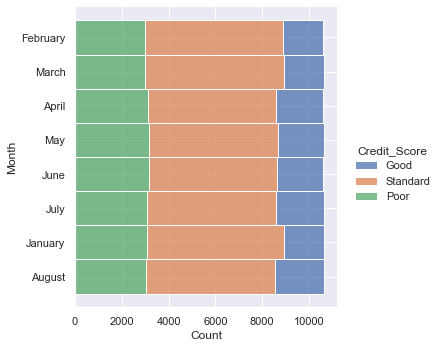

In [334]:
### Distribuição de credit score por mês

sns.displot(data=df_train, y="Month", hue="Credit_Score", multiple="stack")

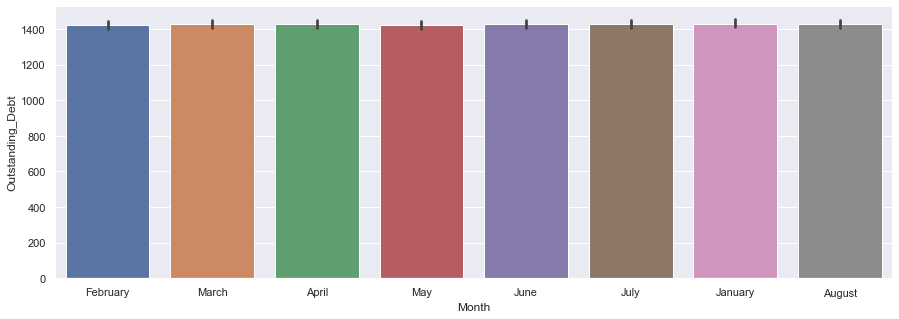

In [335]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=df_train.Month, y=df_train['Outstanding_Debt'])
ax.tick_params(axis='x', rotation=0)

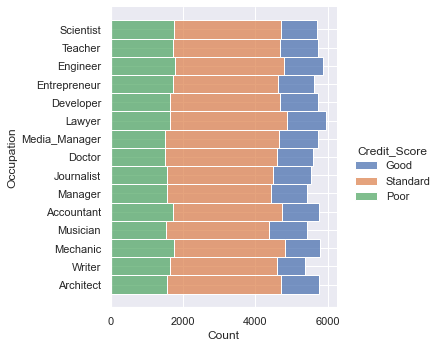

In [336]:
### Distribuição de credit score por ocupação

sns.displot(data=df_train, y="Occupation", hue="Credit_Score", multiple="stack")

Text(0.5, 0, 'Type_of_Loan')

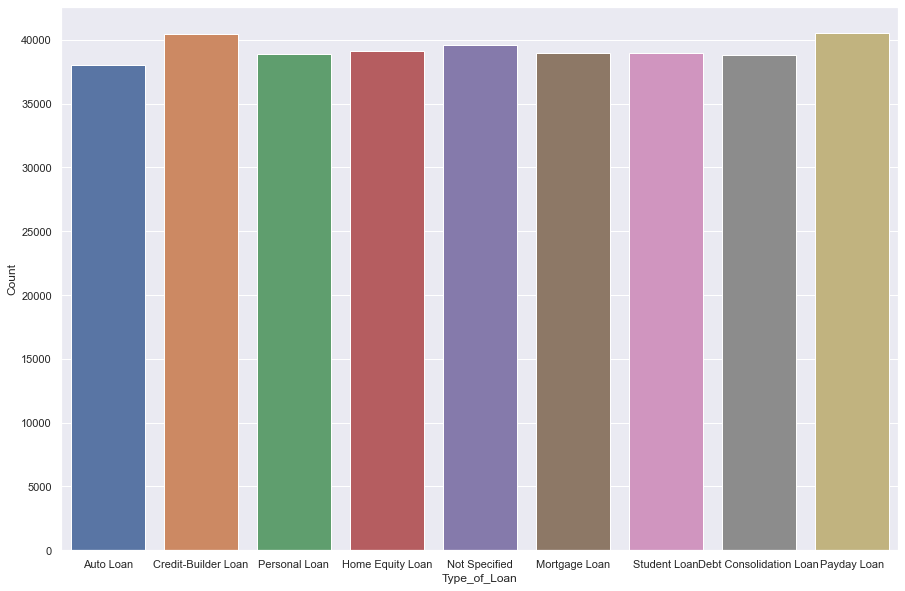

In [337]:
# Type of Loan

## Criando um dicionário para armazenar as contagens de todos os vários tipos de empréstimo

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

### Grafico mostrando a quantidade de cada coluna - Type_of_Loan

sns.set(rc = {'figure.figsize': (15, 10)})
sns.barplot(list(loan_type_dict.keys()), list(loan_type_dict.values()))
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Type_of_Loan', fontsize = 12)

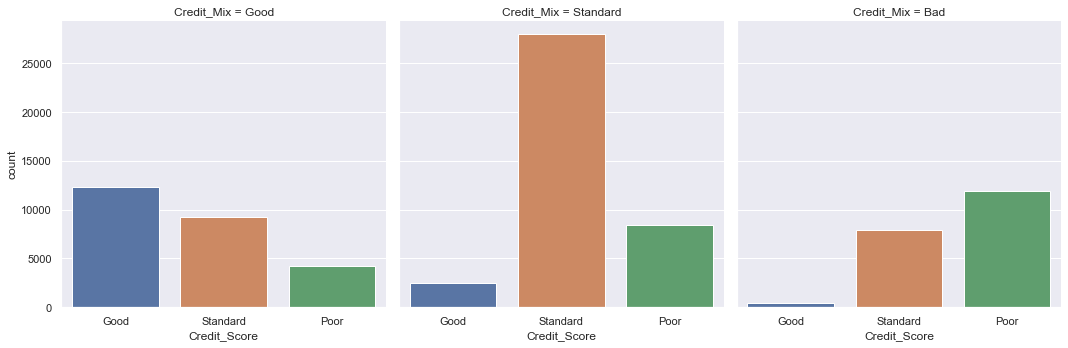

In [338]:
### Distribuição do Credit_Score por cada Credit_Mix

sns.factorplot('Credit_Score', col = 'Credit_Mix', data = df_train, kind = 'count', col_wrap = 3)

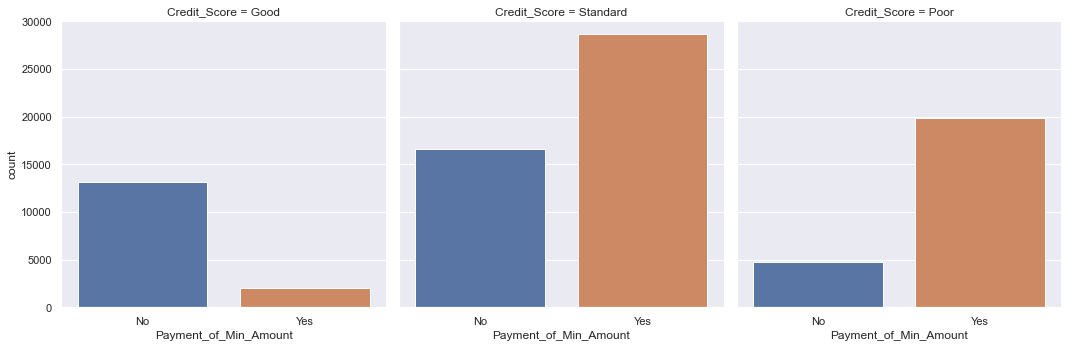

In [339]:
### Distribuição de Payment_of_Min_Amount para cada Credit Score

sns.factorplot('Payment_of_Min_Amount', col = 'Credit_Score', data = df_train, kind = 'count', col_wrap = 3)

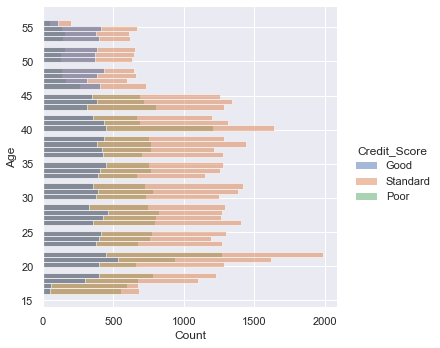

In [340]:
# Distribuição de Idade por Credit Score

sns.displot(data=df_train, y="Age", hue="Credit_Score")

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

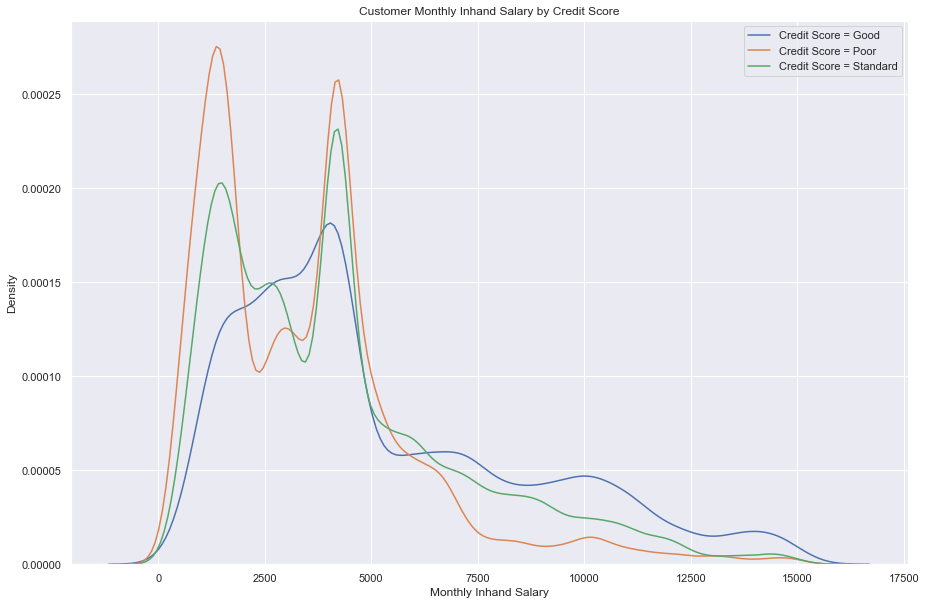

In [341]:

sns.kdeplot(df_train['Monthly_Inhand_Salary'][df_train['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df_train['Monthly_Inhand_Salary'][df_train['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df_train['Monthly_Inhand_Salary'][df_train['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

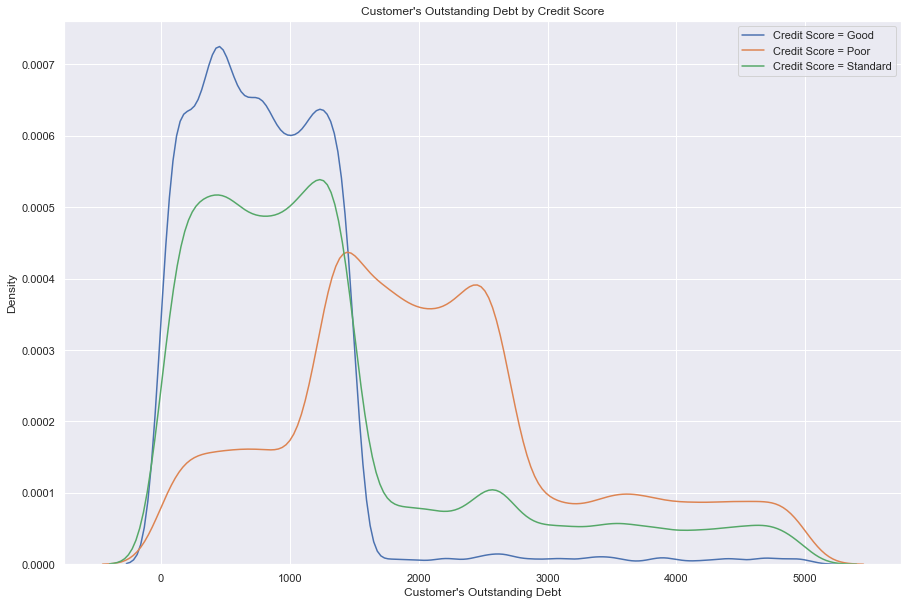

In [342]:
sns.kdeplot(df_train['Outstanding_Debt'][df_train['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df_train['Outstanding_Debt'][df_train['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df_train['Outstanding_Debt'][df_train['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

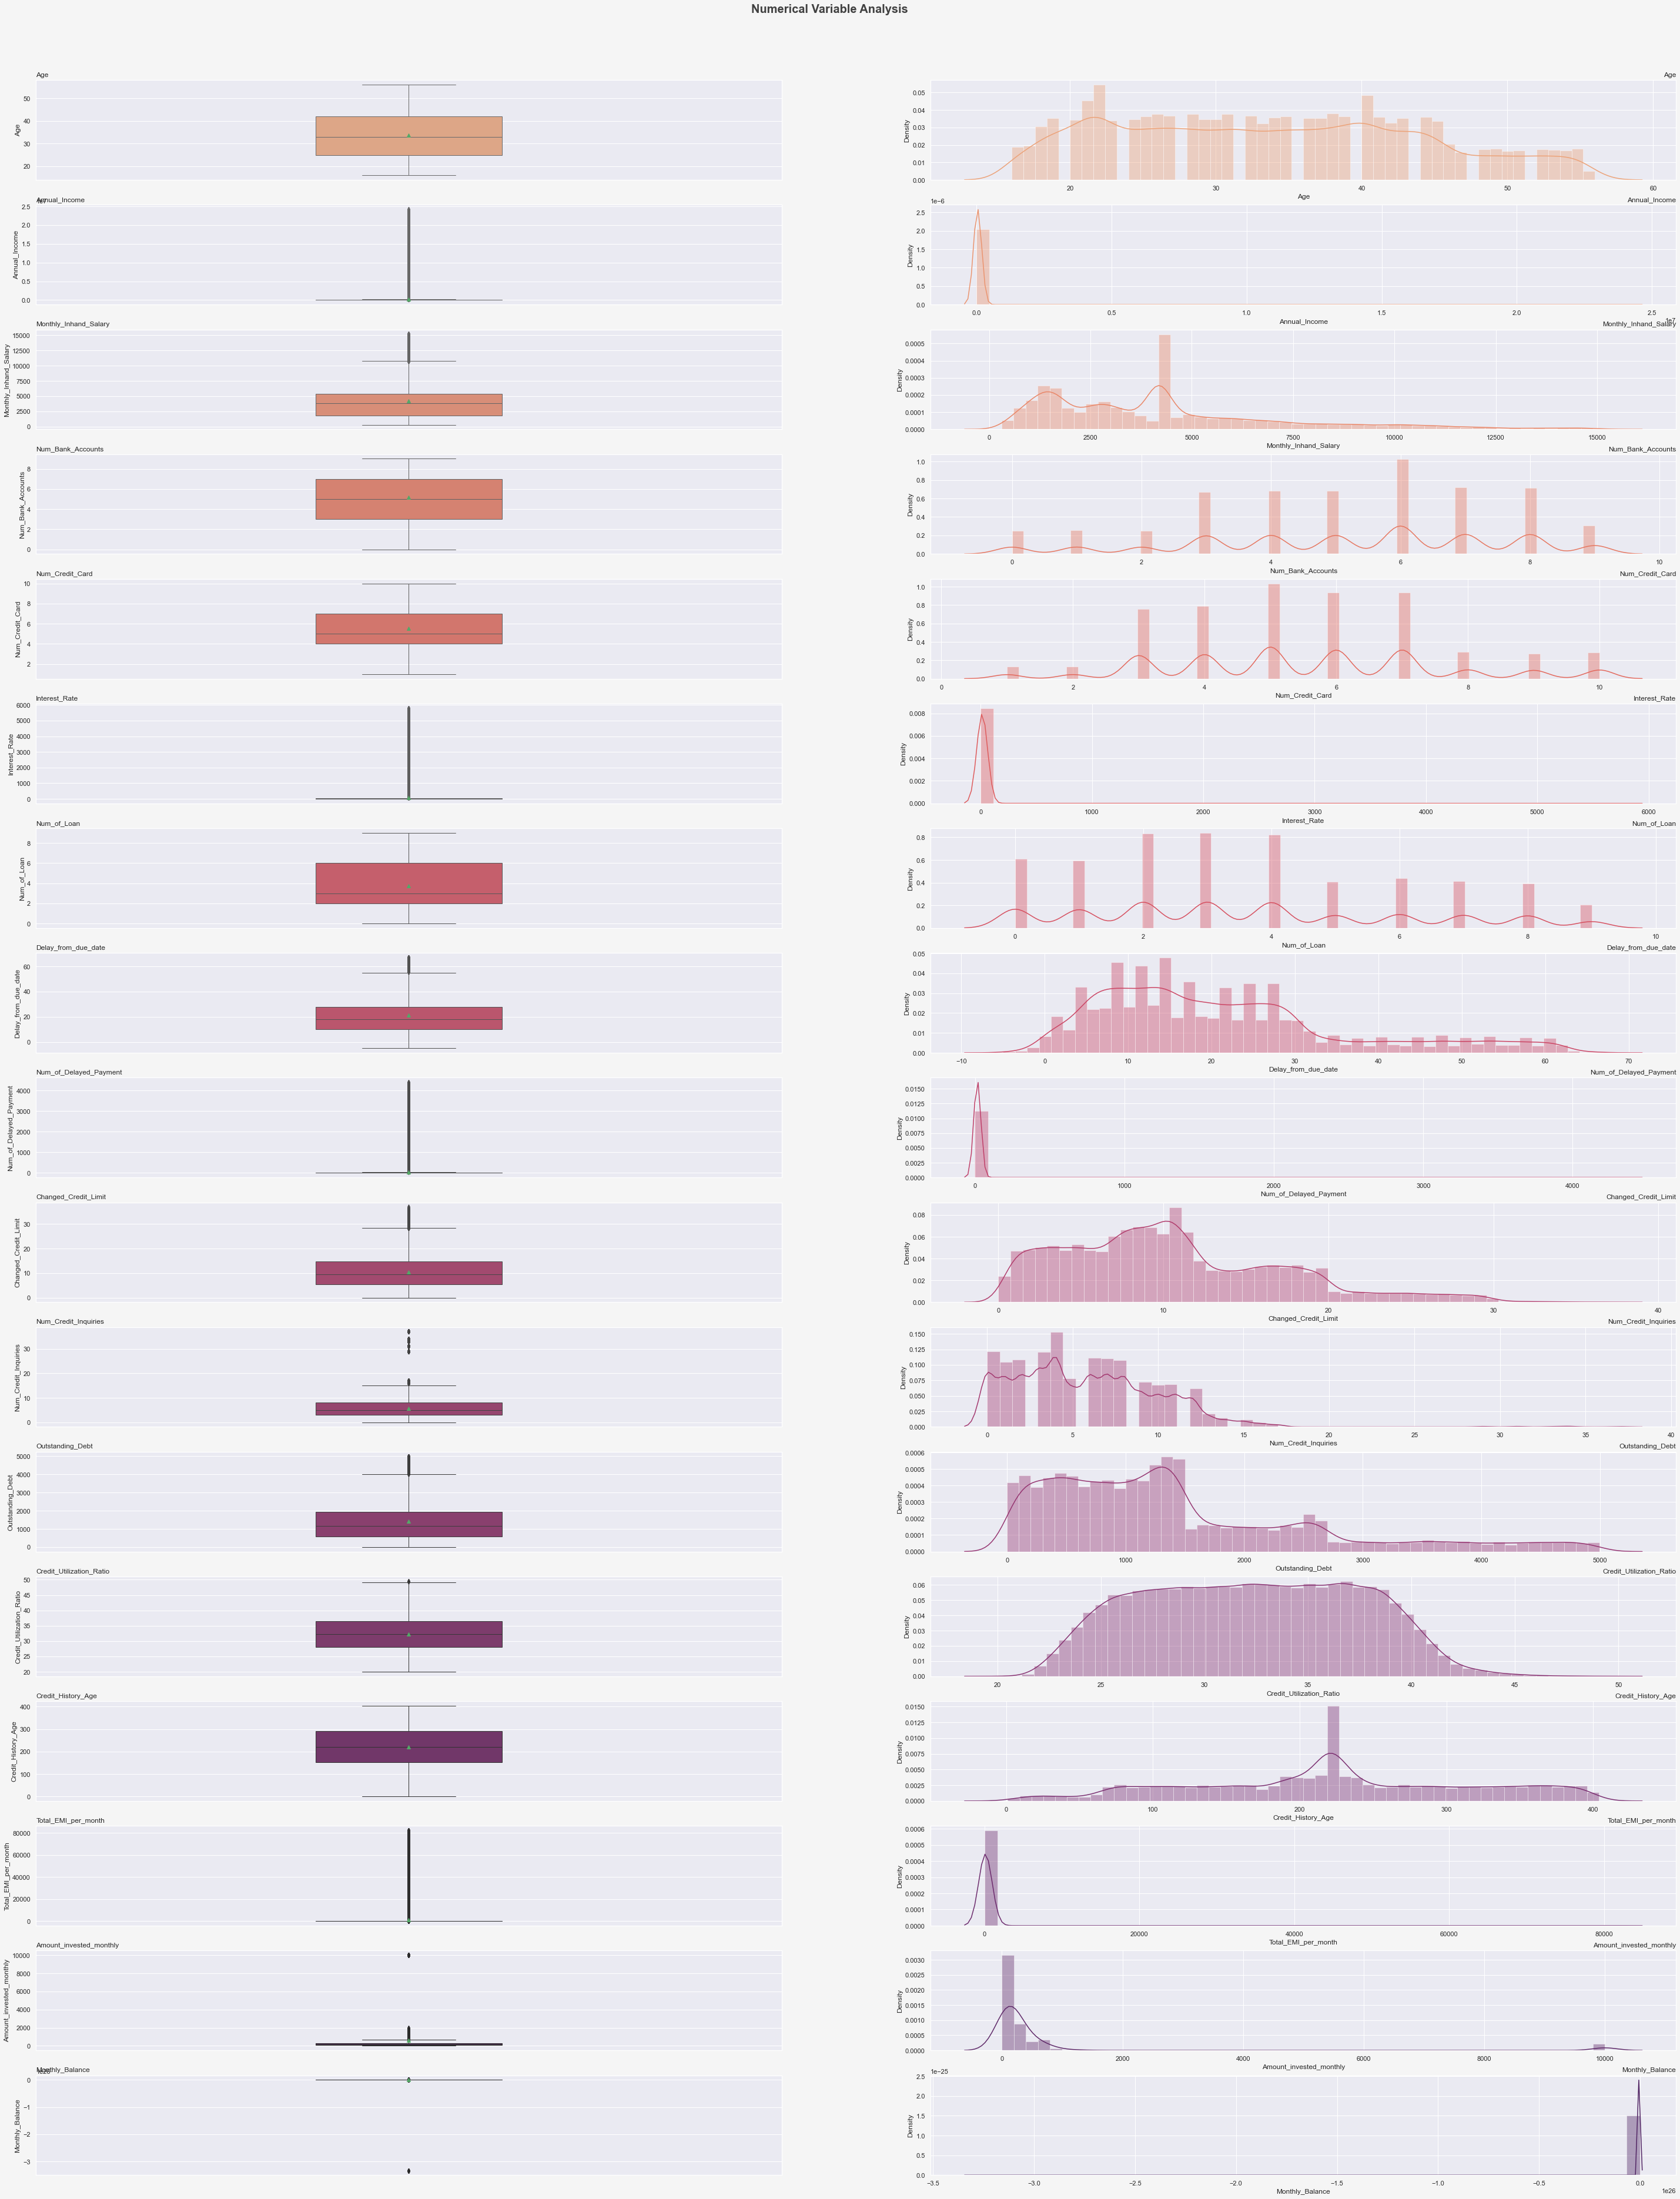

In [343]:
numerical_columns = [col for col in df_train.columns if df_train[col].dtype != 'category' and df_train[col].dtype !='object']

# size
figure, axis = plt.subplots(figsize = (50,60))

#Background
background = "#f5f5f5"
figure.set_facecolor(background)

#Color pallete
color_palette = sns.color_palette('flare', len(numerical_columns) * 2)

#Title
plt.suptitle("Numerical Variable Analysis", fontsize = 20, color = "#404040", fontweight = 600)

#Structure plot
lines = len(numerical_columns)
columns = 2
position = 1

for column in numerical_columns:

    #Boxplot
    plt.subplot(lines, columns, position)

    #Title
    plt.title(f'{column}', loc = 'left', fontsize = 12, fontweight = 200)

    #plot
    sns.boxplot(data = df_train, y = column, showmeans = True, saturation = 0.75,
                linewidth=1, color = color_palette[position], width = 0.25)

    #change position
    position += 1

    #Distplot
    plt.subplot(lines, columns, position)

    #Title
    plt.title(f'{column}', loc = 'right', fontsize = 12, fontweight = 200)

    sns.distplot(df_train[column], color = color_palette[position-1])

    #change position
    position += 1

#Adjust Grid
plt.subplots_adjust(top = .95, hspace = 0.25)

<AxesSubplot:>

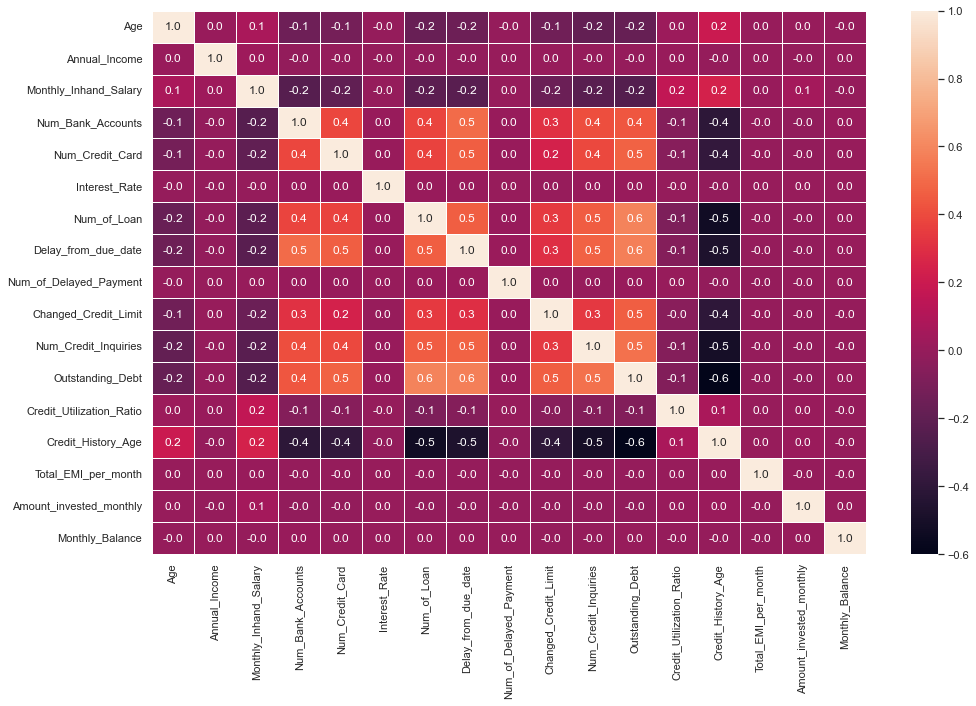

In [344]:

correlation = df_train.corr()
# plot da matriz de correlação

plt.figure(figsize=(16,10))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [345]:
#Criando nova coluna iterando duas colunas correlacionadas

df_train['outs_hist_age']=(df_train['Outstanding_Debt'].astype('float')/df_train['Credit_History_Age'].astype('float'))

## 5. Detect, and Clean Outliers

Apesar de já termos corrigido alguns valores, ainda pudemos ver nos gráficos acima outliers, vamos trata-los.

In [346]:
numerical_columns = [col for col in df_train.columns if df_train[col].dtype != 'category' and df_train[col].dtype !='object']


def limites(coluna):
    q1 = coluna.quantile(0.10)
    q3 = coluna.quantile(0.90)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas



for col in numerical_columns:
    df_train ,linhas_removidas = excluir_outliers(df_train, col)
    print('{} : {} linhas removidas'.format(col, linhas_removidas))



Age : 0 linhas removidas
Annual_Income : 825 linhas removidas
Monthly_Inhand_Salary : 0 linhas removidas
Num_Bank_Accounts : 0 linhas removidas
Num_Credit_Card : 0 linhas removidas
Interest_Rate : 1722 linhas removidas
Num_of_Loan : 0 linhas removidas
Delay_from_due_date : 0 linhas removidas
Num_of_Delayed_Payment : 609 linhas removidas
Changed_Credit_Limit : 0 linhas removidas
Num_Credit_Inquiries : 291 linhas removidas
Outstanding_Debt : 0 linhas removidas
Credit_Utilization_Ratio : 0 linhas removidas
Credit_History_Age : 0 linhas removidas
Total_EMI_per_month : 3075 linhas removidas
Amount_invested_monthly : 3411 linhas removidas
Monthly_Balance : 50 linhas removidas
outs_hist_age : 2647 linhas removidas


In [347]:
# numerical_columns = [col for col in df_train.columns if df_train[col].dtype != 'category' and df_train[col].dtype !='object']

# # size
# figure, axis = plt.subplots(figsize = (50,60))

# #Background
# background = "#f5f5f5"
# figure.set_facecolor(background)

# #Color pallete
# color_palette = sns.color_palette('flare', len(numerical_columns) * 2)

# #Title
# plt.suptitle("Numerical Variable Analysis", fontsize = 20, color = "#404040", fontweight = 600)

# #Structure plot
# lines = len(numerical_columns)
# columns = 2
# position = 1

# for column in numerical_columns:

#     #Boxplot
#     plt.subplot(lines, columns, position)

#     #Title
#     plt.title(f'{column}', loc = 'left', fontsize = 12, fontweight = 200)

#     #plot
#     sns.boxplot(data = df_train, y = column, showmeans = True, saturation = 0.75,
#                 linewidth=1, color = color_palette[position], width = 0.25)

#     #change position
#     position += 1

#     #Distplot
#     plt.subplot(lines, columns, position)

#     #Title
#     plt.title(f'{column}', loc = 'right', fontsize = 12, fontweight = 200)

#     sns.distplot(df_train[column], color = color_palette[position-1])

#     #change position
#     position += 1

# #Adjust Grid
# plt.subplots_adjust(top = .95, hspace = 0.25)

Apesar de termos excluido os outliers da base, ainda temos uma base bem robusta.

In [348]:
df_train.shape

(72360, 25)

In [349]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72360 entries, 1 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     72360 non-null  object 
 1   Age                       72360 non-null  int32  
 2   Occupation                72360 non-null  object 
 3   Annual_Income             72360 non-null  float64
 4   Monthly_Inhand_Salary     72360 non-null  float64
 5   Num_Bank_Accounts         72360 non-null  int64  
 6   Num_Credit_Card           72360 non-null  int64  
 7   Interest_Rate             72360 non-null  int64  
 8   Num_of_Loan               72360 non-null  int32  
 9   Type_of_Loan              72360 non-null  object 
 10  Delay_from_due_date       72360 non-null  int64  
 11  Num_of_Delayed_Payment    72360 non-null  float64
 12  Changed_Credit_Limit      72360 non-null  float64
 13  Num_Credit_Inquiries      72360 non-null  float64
 14  Credit

## 6. Data Preprocessing


### Feature encoding

In [350]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for column in df_train.columns:
  if df_train[column].dtypes == 'object':
    df_train[column] = ordinal_encoder.fit_transform(df_train[[column]])




In [351]:
df_train.fillna(0, inplace=True)

In [352]:
X = df_train.copy()
y = X.pop("Credit_Score")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

Annual_Income               0.594643
Outstanding_Debt            0.586461
Total_EMI_per_month         0.531550
Monthly_Inhand_Salary       0.462223
Type_of_Loan                0.315890
Interest_Rate               0.178279
Credit_Mix                  0.175833
outs_hist_age               0.159417
Delay_from_due_date         0.120531
Payment_of_Min_Amount       0.114378
Num_Credit_Inquiries        0.111494
Num_Credit_Card             0.097614
Credit_History_Age          0.092481
Num_Bank_Accounts           0.089251
Changed_Credit_Limit        0.088951
Num_of_Loan                 0.078864
Num_of_Delayed_Payment      0.077654
Monthly_Balance             0.028971
Age                         0.019103
Payment_Behaviour           0.008669
Amount_invested_monthly     0.006287
Month                       0.002384
Occupation                  0.001275
Credit_Utilization_Ratio    0.000000
Name: MI Scores, dtype: float64


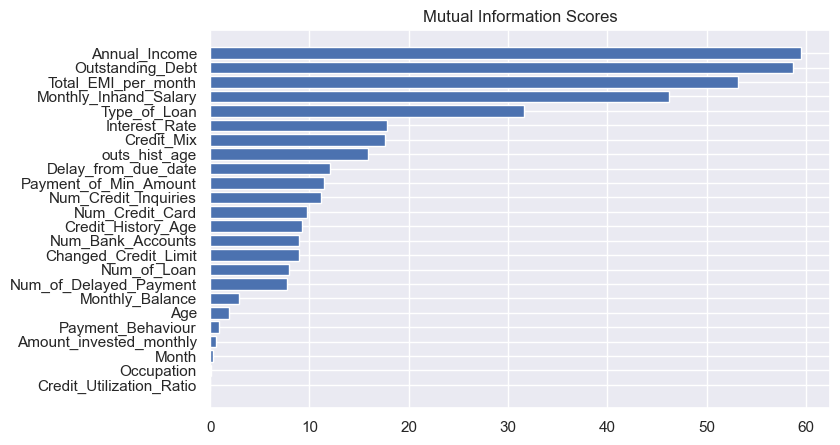

In [353]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores*100)

In [354]:
df_train = df_train.drop(['Month',  'Occupation', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Payment_Behaviour','outs_hist_age'], axis=1)

In [355]:
df_train.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [356]:
df_train.shape

(72360, 19)

In [357]:
df_train.Credit_Score.value_counts()

2.0    38639
1.0    20662
0.0    13059
Name: Credit_Score, dtype: int64

### Padronização

In [358]:
X = df_train.copy()
X.drop(columns='Credit_Score', inplace=True)

y = df_train['Credit_Score']

- Separa os dados em treino e teste

Essa etapa é crucial. As Inteligências Artificiais aprendendo com o que chamamos de treino.

Basicamente o que a gente faz é: a gente separa as informações em treino e teste, ex: 10% da base de dados vai servir para teste e 90% para treino (normalmente treino é maior mesmo)

Aí, damos para o modelo os dados de treino, ele vai olhar aqueles dados e aprender a classificar os dados.

Depois que ele aprende, você faz um teste com ele, com os dados de teste, para ver se ela está bom ou não. Analisando os dados de teste você descobre o melhor modelo

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1, stratify=y)

In [360]:
# numerical_cols = [col for col in X_train.columns if X_train[col].dtype != 'category' and X_train[col].dtype !='object']

In [361]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [362]:
y_train = y_train.astype('int')

In [363]:
df_train.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

### Balanceamento das classes

In [364]:
#Tamanho antes do balanceamento

np.bincount(y_train)

array([10447, 16530, 30911], dtype=int64)

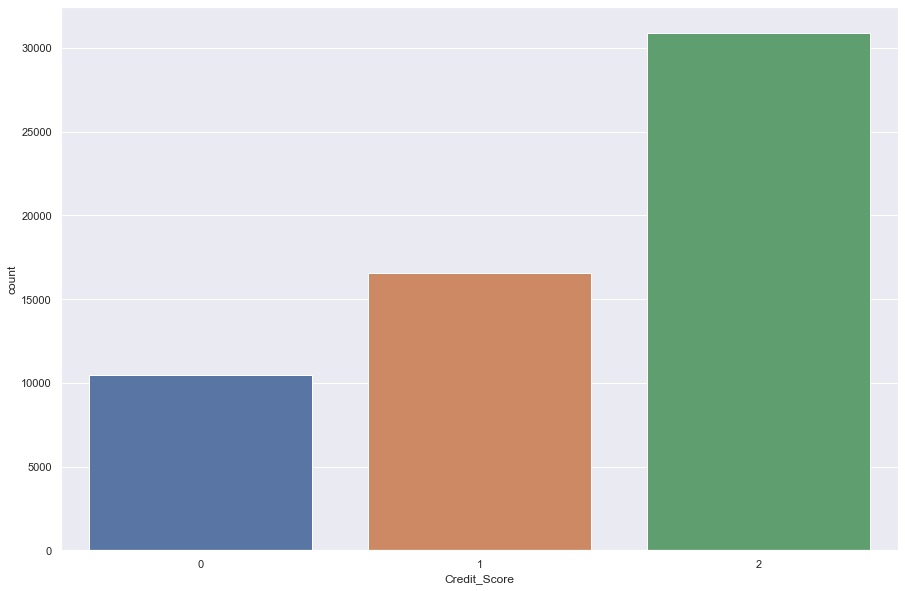

In [365]:
ax = sns.countplot(x=y_train)

In [366]:
# Balanceamento

oversample = SMOTE()

sm = SMOTE(random_state=3)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [367]:
#Utilizando o NearMiss a acc reduziu 14 pp

# from imblearn.under_sampling import NearMiss 

# nm = NearMiss()
# X_train, y_train = nm.fit_sample(X_train, y_train.ravel())
# print('Resampled dataset shape {}'.format(Counter(y_train)))



In [368]:
# Tamanho após balanceamento

np.bincount(y_train)

array([30911, 30911, 30911], dtype=int64)

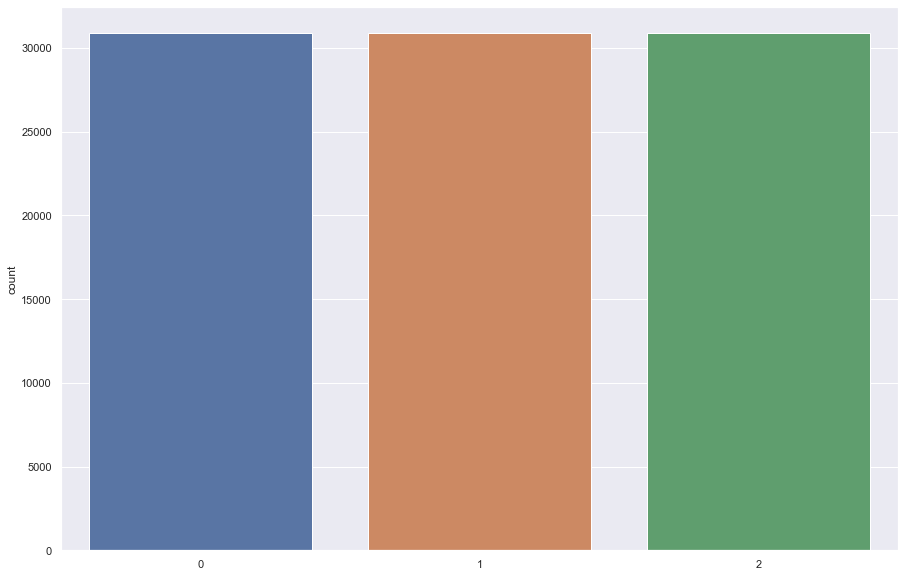

In [369]:
ax = sns.countplot(x=y_train)

# 7. Modelling

- Métricas de Avaliação

Vamos usar aqui a acurácia, precisão e f1 score que vai nos dizer o quão bem o nosso modelo consegue explicar o target. Isso seria um ótimo parâmetro para ver o quão bom é nosso modelo

-> Quanto mais próximo de 100%, melhor

In [370]:
def avaliar_modelo(nome_modelo, y_test, previsao):
    Precision = precision_score(y_test, previsao, average='weighted')
    CR = classification_report(y_test, previsao)
    return f"Modelo\033[1m {nome_modelo}\033[0m:\nPrecision:{Precision:.2%}\nClassification Report:\n{CR}"

- Escolha dos Modelos a Serem Testados

DecisionTree
LogisticRegression
RandomForestClassifier

Esses são alguns dos modelos que existem que têm o propósito de classificar características de um sistema de dados, de modo a associar um conjunto de observações sob a mesma caracterização. 

In [371]:
modelo_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo_lr = LogisticRegression()
modelo_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
modelo_et = ExtraTreesClassifier(n_estimators = 100,bootstrap = True)

modelos = {'DecisionTree': modelo_dt,
          'LogisticRegression': modelo_lr,
          'RandomForest': modelo_rf,
          'ExtraTreesClassifier': modelo_et
          }

In [372]:
for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)

### Análise do Melhor Modelo

In [373]:
 from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for nome_modelo, modelo in modelos.items():
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo DecisionTree:
Precision:72.29%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.66      2612
         1.0       0.70      0.73      0.71      4132
         2.0       0.76      0.73      0.75      7728

    accuracy                           0.72     14472
   macro avg       0.70      0.71      0.71     14472
weighted avg       0.72      0.72      0.72     14472

Modelo LogisticRegression:
Precision:69.53%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.83      0.60      2612
         1.0       0.64      0.66      0.65      4132
         2.0       0.80      0.58      0.67      7728

    accuracy                           0.65     14472
   macro avg       0.64      0.69      0.64     14472
weighted avg       0.70      0.65      0.65     14472

Modelo RandomForest:
Precision:80.11%
Classification Report:
              precision    recall  f1-score   sup

In [375]:
df = pd.DataFrame(X_train, columns=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Monthly_Balance'])
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
0,0.879284,-0.265007,-0.292189,-1.729865,-0.230378,-1.303950,-0.639765,-1.354151,-0.657234,-0.579399,-0.820933,-1.174426,-0.329710,-0.974914,-0.458086,-1.182712,-0.427185,-0.778618
1,-1.217268,-0.758493,-0.729501,-0.037809,0.738499,-0.838598,-1.039747,-1.741933,-0.588605,-1.635169,-1.053543,-1.431145,-0.329710,-0.644449,-0.075606,-1.182712,-0.836797,-0.110319
2,-1.693757,0.416525,0.538318,1.231233,-1.199254,0.324783,0.160199,0.247245,-0.519977,0.740315,-0.440583,0.365890,0.938479,0.101471,0.481465,0.845515,0.974717,-0.305634
3,-0.359588,2.093602,2.195669,-1.306851,-0.714816,-1.536626,0.160199,-0.551059,-0.725862,-0.843341,0.181807,-0.917706,-0.329710,-0.093094,0.045245,-1.182712,2.854854,0.574187
4,0.974582,0.133849,0.060504,1.231233,-0.230378,0.790136,0.960162,1.060509,2.431045,0.476372,0.472570,1.392766,-1.597898,0.419842,-0.075606,0.845515,1.046610,-0.342508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92728,1.685835,1.204595,1.291325,-0.298331,0.067973,-0.999625,-0.239783,0.109509,-0.018228,-0.904507,-0.054440,-1.135304,-0.329710,-0.306945,-0.160384,-1.182712,1.102964,1.454497
92729,-1.407864,0.692879,0.096209,0.385205,1.222937,2.069854,2.160107,-0.089671,1.470247,1.088596,1.302423,1.618599,-1.597898,3.224618,-1.102368,0.845515,4.637260,-1.727655
92730,-1.438806,-0.233479,-0.171603,0.385205,2.191813,0.111748,-0.239783,0.926649,0.209984,0.388961,0.026084,1.689500,0.938479,0.408960,-1.228553,0.845515,-0.016807,0.216941
92731,-0.073694,1.021261,1.168881,-0.037809,-0.230378,-1.187612,0.160199,-0.750336,-0.039578,-0.432974,-0.792642,-0.404268,-0.329710,-0.472157,0.891179,-1.182712,0.525337,0.793257


,0
Outstanding_Debt,12.058751
Interest_Rate,9.025550
Delay_from_due_date,7.195973
Credit_History_Age,7.164522
Credit_Mix,6.872958
Num_Credit_Inquiries,5.698064
Changed_Credit_Limit,5.107255
Payment_of_Min_Amount,5.037832
Monthly_Balance,5.018234
Num_Credit_Card,4.974775


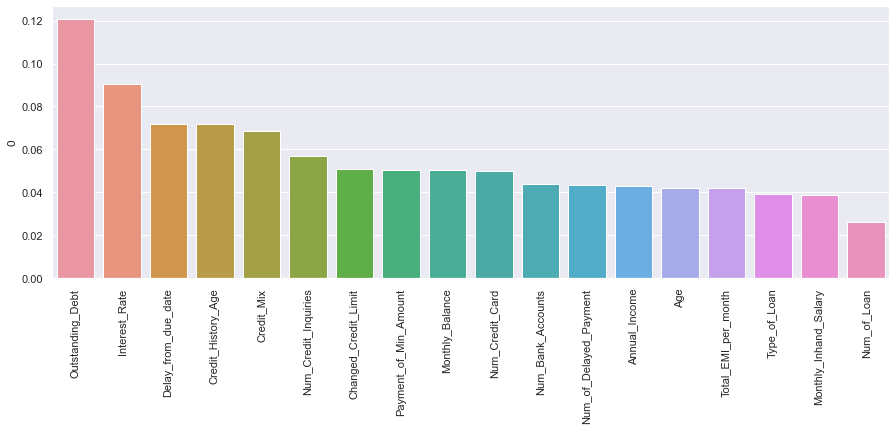

In [376]:
# print(rfc.feature_importances_)
# print(X_train.columns)

importancia_features = pd.DataFrame(modelo_rf.feature_importances_, df.columns)

importancia_features=importancia_features.sort_values(by=0, ascending=False)
display(importancia_features*100)

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

In [377]:
data, target = df_train.drop(columns = ['Credit_Score']), df_train['Credit_Score']

scores = cross_val_score(modelo_rf, data, target, cv=10, scoring='accuracy')

# Results
print("accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

accuracy: 0.69 (+/- 0.02)


In [378]:
print(scores.min().round(2),scores.mean().round(2), scores.max().round(2))

0.68 0.69 0.72


In [379]:
#Para exportar:

import pickle


pickle.dump(modelo_rf, open('modelo_rf.pickle','wb'))
pickle.dump(sc, open('sc.pickle','wb'))



# TESTE

In [380]:
dfteste = pd.read_csv('test.csv')
df=dfteste

In [381]:
sc = pickle.load(open('sc.pickle', 'rb'))

loaded_model = pickle.load(open('modelo_rf.pickle', 'rb'))


In [382]:
# Tirar caracteres especiais

df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

#Alterar o tipo dos dados

df.Age = df.Age.astype(int)
df.Annual_Income = df.Annual_Income.astype(float)
df.Num_of_Loan = df.Num_of_Loan.astype(int)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(float)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.astype(float)
df.Outstanding_Debt = df.Outstanding_Debt.astype(float)
df.Amount_invested_monthly = df.Amount_invested_monthly.astype(float)
df.Monthly_Balance = df.Monthly_Balance.astype(float)

# Tranformando a coluna de tempo de histórico de crédito de texto para tempo 

nd= df.copy()
nd['Credit_History_Age'] = nd['Credit_History_Age'].replace('nan', np.nan).fillna(0)   
nd['Credit_History_Age'] = nd['Credit_History_Age'].astype(str)                       
nd['History_Year'] = nd['Credit_History_Age'].str[ :2]          
nd['History_Month'] = nd['Credit_History_Age'].str[ -9:-7] 

nd['History_Year'] = pd.to_numeric(nd['History_Year']) 
nd['History_Month'] = pd.to_numeric(nd['History_Month']) 
nd['Credit_History_Age'] = nd['History_Year']*12 + nd['History_Month'] 
nd = nd.drop(['History_Year'], axis = 1)  
nd = nd.drop(['History_Month'], axis = 1)
df = nd



df= df.drop(['Month', 'Credit_Utilization_Ratio', 'Occupation', 'Amount_invested_monthly','Payment_Behaviour'], axis=1)

def cleaning_Null_columns(df_column,method,headlines):
  print('Antes: \n',)
  print(df_column.value_counts(dropna = False).head(headlines))
  print('\n-----------------------------------\n')
  print('Depois: \n')
  df_column.fillna(method = method, inplace = True)
  return df_column.value_counts(dropna = False)

cleaning_Null_columns(df['Credit_Mix'],'ffill',40)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].mean())
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean())
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0)
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(0)
df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis = 1, inplace = True)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for column in df.columns:
  if df[column].dtypes == 'object':
    df[column] = ordinal_encoder.fit_transform(df[[column]])
df.fillna(0, inplace=True)
X = df.copy()

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    

df = sc.transform(df)   
    


Antes: 

Standard    18379
Good        12260
NaN          9805
Bad          9556
Name: Credit_Mix, dtype: int64

-----------------------------------

Depois: 



In [383]:
previsao = loaded_model.predict(df)

In [384]:
y =  pd.DataFrame(previsao, columns=['Credit_Score'])

y

,Credit_Score
0,0
1,0
2,0
3,0
4,0
...,...
49995,1
49996,2
49997,2
49998,2


In [385]:
output = pd.DataFrame({'Customer_ID': dfteste.Customer_ID, 'prediction': previsao})
output.to_excel('submission.xlsx', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [386]:
output.prediction.value_counts()

2    26319
1    14198
0     9483
Name: prediction, dtype: int64